In [1]:
import pandas as pd
import get_data as gd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from os import walk
import csv
from pychadwick.chadwick import Chadwick  
#https://github.com/jldbc/pybaseball
#https://baseballsavant.mlb.com/csv-docs
from pybaseball import statcast_pitcher
import seaborn as sns
from pybaseball import statcast

In [2]:
teams_df = gd.make_df("Teams") 

In [21]:
teams_df['Win Percentage'] = teams_df['W']/teams_df['G']*100
teams_df['Runs Per Game'] = teams_df['R']/teams_df['G']
teams_df['Runs Allowed Per Game'] = teams_df['RA']/teams_df['G']
teams_df['Run Difference Per Game'] = teams_df['Runs Per Game'] - teams_df['Runs Allowed Per Game'] 

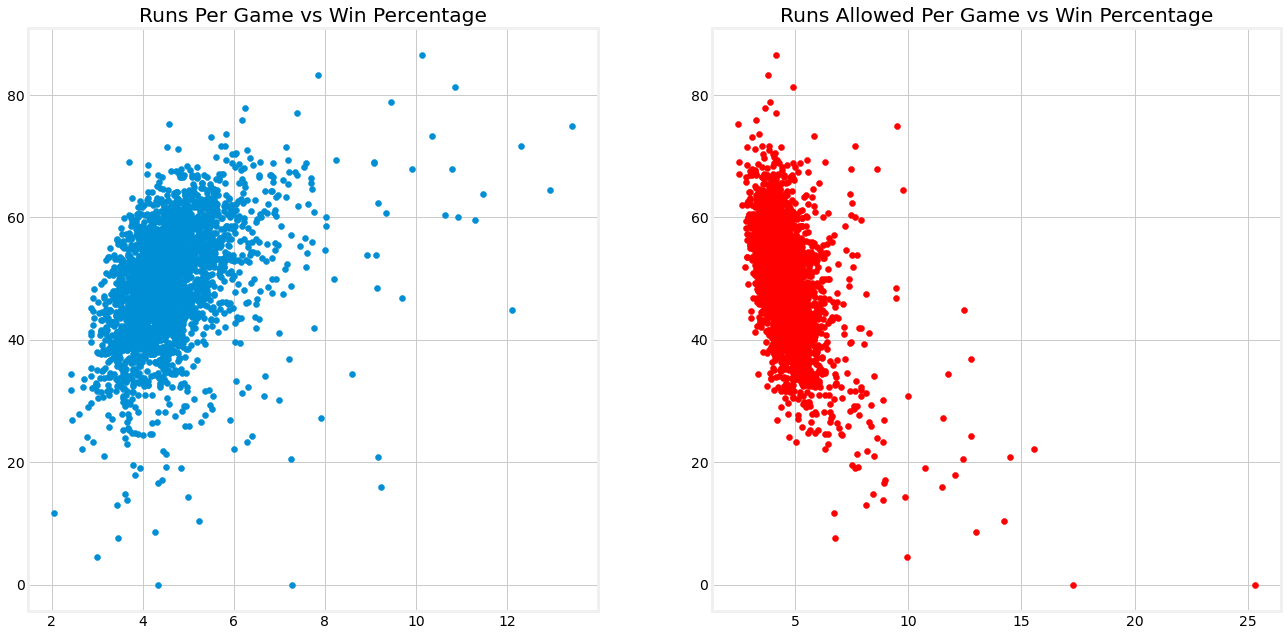

In [9]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(20,10))

gs = fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

fig.patch.set_facecolor('white')
ax1.set_facecolor('white')
ax1.scatter(teams_df['Runs Per Game'], teams_df['Win Percentage'])
ax1.set_title('Runs Per Game vs Win Percentage')

fig.patch.set_facecolor('white')
ax2.set_facecolor('white')
ax2.scatter(teams_df['Runs Allowed Per Game'], teams_df['Win Percentage'], color='red')
ax2.set_title('Runs Allowed Per Game vs Win Percentage')
plt.show()

In [10]:
import statsmodels.api as sm

In [22]:
teams_df['Intercept'] = 1
runs_model = sm.OLS(teams_df['Win Percentage'], 
                    teams_df[['Runs Per Game','Intercept']], 
                    hasconst=True).fit()
runs_allowed_model = sm.OLS(teams_df['Win Percentage'], 
                            teams_df[['Runs Allowed Per Game','Intercept']], hasconst=True).fit()
runs_difference_model = sm.OLS(teams_df['Win Percentage'], 
                            teams_df[['Run Difference Per Game','Intercept']], hasconst=True).fit()
full_model = sm.OLS(teams_df['Win Percentage'], 
                            teams_df[['Runs Per Game','Runs Allowed Per Game','Intercept']], hasconst=True).fit()


In [23]:
print(runs_model.summary())

                            OLS Regression Results                            
Dep. Variable:         Win Percentage   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     626.9
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.25e-125
Time:                        17:59:58   Log-Likelihood:                -10532.
No. Observations:                2955   AIC:                         2.107e+04
Df Residuals:                    2953   BIC:                         2.108e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Runs Per Game     4.0434      0.161     25.038

In [24]:
print(runs_allowed_model.summary())

                            OLS Regression Results                            
Dep. Variable:         Win Percentage   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     1155.
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          6.00e-214
Time:                        17:59:59   Log-Likelihood:                -10329.
No. Observations:                2955   AIC:                         2.066e+04
Df Residuals:                    2953   BIC:                         2.067e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Runs Allowed Per Game    -4.33

In [26]:
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:         Win Percentage   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     5715.
Date:                Sat, 03 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:00:18   Log-Likelihood:                -8476.7
No. Observations:                2955   AIC:                         1.696e+04
Df Residuals:                    2952   BIC:                         1.698e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Runs Per Game             7.67

In [27]:
prediction = full_model.predict(teams_df[['Runs Per Game','Runs Allowed Per Game','Intercept']])
res = prediction - teams_df['Win Percentage']


(-20.0, 20.0)

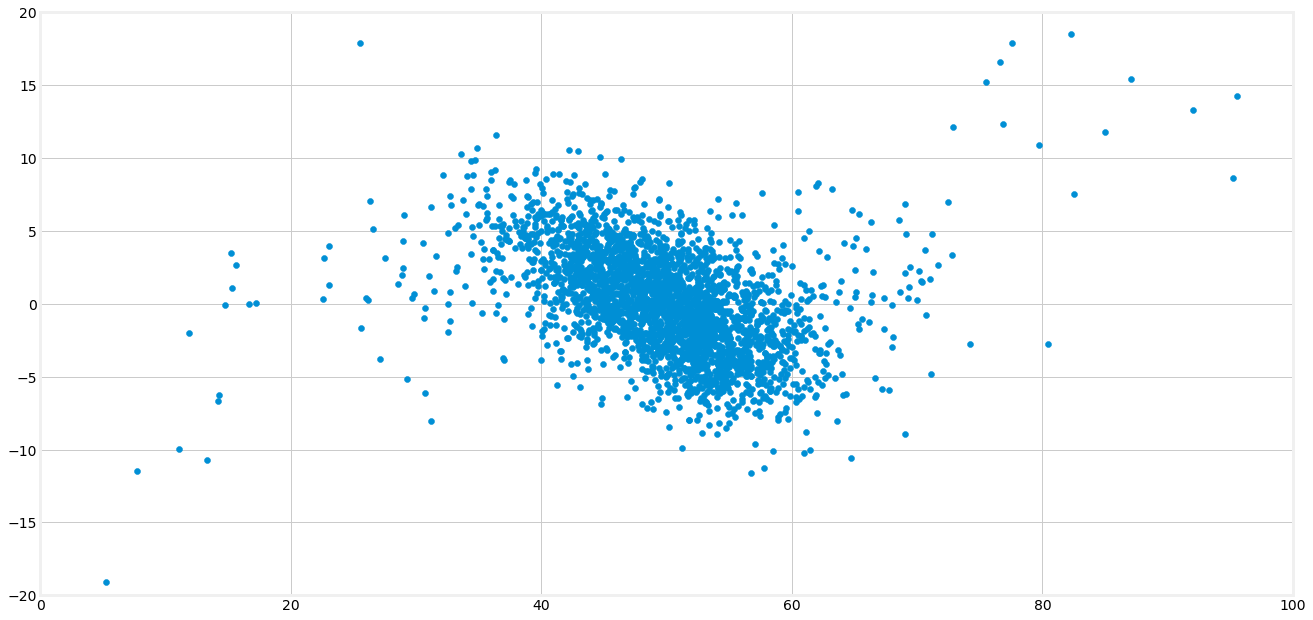

In [34]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize= (20,10))
fig.patch.set_facecolor('white')
ax.scatter(prediction, res)
ax.set_facecolor('white')
ax.set_xlim(0,100)
ax.set_ylim(-20,20)
#ax.set_title('Average Runs by League')